In [39]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train = 'criminal_train.csv'
train_df = read_csv(train)

test = 'criminal_test.csv'
test_df = read_csv(test)

In [3]:
combine = [train_df,test_df]

In [4]:
train_df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
train_df.tail()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
45713,29663679,4,1,3,1,2,1,1,1,99,...,2,2,2,2,2,2,11212.106960,40011,1,0
45714,43073679,4,0,3,1,1,1,2,1,2,...,2,2,1,1,2,2,5733.239983,40035,2,0
45715,52173679,4,0,6,1,4,1,2,1,99,...,2,2,1,1,2,2,1490.027425,40040,1,0
45716,29283679,4,0,1,1,1,1,1,1,99,...,2,2,2,2,2,2,3847.137418,40050,1,0
45717,87483679,4,0,4,1,1,1,1,1,99,...,2,2,1,1,2,2,11357.793720,40018,2,0


In [6]:
train_df.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1252.396472,40013.000000,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2719.335160,40025.000000,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5765.810794,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


In [7]:
id = test_df['PERID']
train_df = train_df.drop(['PERID'],axis=1)
test_df = test_df.drop(['PERID'],axis=1)

In [8]:
train_df = train_df.values
test_df = test_df.values

In [9]:
split = int(0.80*train_df.shape[0])
x_train = train_df[:split,:-1]
y_train = train_df[:split,-1]
x_test = train_df[split:,:-1]
y_test = train_df[split:,-1]
print (split)
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)

36574
(36574, 70) (36574,)
(9144, 70) (9144,)


In [10]:
def pca(X,d=None):
    if d==None:
        d = X.shape[1]
        
    A = np.cov(X,rowvar=False)
    eig_vals,eig_vecs = np.linalg.eig(A)
    Z = X.dot(eig_vecs)
    red_Z = Z[:,:d]
    return eig_vals,eig_vecs,Z,red_Z

In [11]:
eig_vals,eig_vecs,Z,red_Z = pca(x_train)

In [12]:
print (eig_vals.shape,eig_vecs.shape)
print (Z.shape)

(70,) (70, 70)
(36574, 70)


In [14]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix],eig_vecs[:,ix]]
    info.append(dx)
info = sorted(info,reverse=True,key=lambda z:z[0])

sorted_vals = []
sorted_vecs = []
for ix in range(eig_vals.shape[0]):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)
print (sorted_vals.shape)
print (sorted_vecs.shape)

(70,)
(70, 70)


In [15]:
explained_variances_ratio = sorted_vals/sum(sorted_vals)

In [16]:
cumulative_explained_ratio = np.cumsum(explained_variances_ratio)

In [18]:
cumulative_explained_ratio[5]

0.9999420085020292

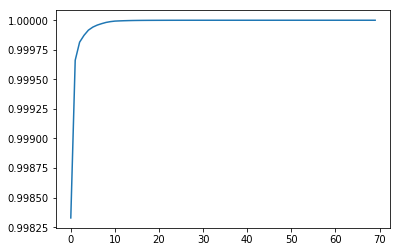

In [19]:
plt.plot(np.cumsum(explained_variances_ratio))

In [20]:
def new_pca(X,d=None):
    
    if d==None:
        d = X.shape[1]
        
    A = np.cov(X,rowvar=False)
    eig_vals,eig_vecs = np.linalg.eig(A)
#     Z = X.dot(eig_vecs)
#     red_Z = Z[:,:d]
   
    info = []
    for ix in range(eig_vals.shape[0]):
        dx = [eig_vals[ix],eig_vecs[:,ix]]
        info.append(dx)
    info = sorted(info,reverse=True,key=lambda z:z[0])
    
    sorted_vals = []
    sorted_vecs = []
    for ix in range(eig_vals.shape[0]):
        sorted_vals.append(info[ix][0])
        sorted_vecs.append(info[ix][1])
    sorted_vals = np.asarray(sorted_vals)
    sorted_vecs = np.asarray(sorted_vecs)
    
    Z = X.dot(sorted_vecs)
    red_Z = X[:,:d]
    return eig_vals,eig_vecs,Z,red_Z

In [21]:
eig_vals,eig_vecs,Z,red_Z1 = new_pca(x_train,d=35)
eig_vals,eig_vecs,Z,red_Z2 = new_pca(x_test,d=35)

In [23]:
print (red_Z1.shape)
print (red_Z2.shape)

(36574, 35)
(9144, 35)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [27]:
dtc.fit(red_Z1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
print (dtc.score(red_Z1,y_train))
print (dtc.score(red_Z2,y_test))

0.939820637611418
0.928915135608049


In [30]:
rfc.fit(red_Z1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
print (rfc.score(red_Z1,y_train))
print (rfc.score(red_Z2,y_test))

0.9389730409580577
0.9296806649168854


In [33]:
_,_,_,red_Z3 = new_pca(test_df,d=35)

In [34]:
predictions = rfc.predict(red_Z3)

In [40]:
dataframe = {
    'PERID' : id,
    'Criminal': predictions
}

In [41]:
output = pd.DataFrame(data=dataframe)

In [42]:
output.to_csv('pca_out.csv',sep=',',index=False,columns=['PERID','Criminal'])